# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")
sns.set() 
star_data = pd.read_csv('nasa.csv')

In [2]:
star_data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
star_data.shape

(4687, 40)

<b> There are 40 columns and 4687 observations in the nasa dataset

In [4]:
count = 1
for col in star_data.columns:
    print(f'{count} \t {col}')
    count+=1

1 	 Neo Reference ID
2 	 Name
3 	 Absolute Magnitude
4 	 Est Dia in KM(min)
5 	 Est Dia in KM(max)
6 	 Est Dia in M(min)
7 	 Est Dia in M(max)
8 	 Est Dia in Miles(min)
9 	 Est Dia in Miles(max)
10 	 Est Dia in Feet(min)
11 	 Est Dia in Feet(max)
12 	 Close Approach Date
13 	 Epoch Date Close Approach
14 	 Relative Velocity km per sec
15 	 Relative Velocity km per hr
16 	 Miles per hour
17 	 Miss Dist.(Astronomical)
18 	 Miss Dist.(lunar)
19 	 Miss Dist.(kilometers)
20 	 Miss Dist.(miles)
21 	 Orbiting Body
22 	 Orbit ID
23 	 Orbit Determination Date
24 	 Orbit Uncertainity
25 	 Minimum Orbit Intersection
26 	 Jupiter Tisserand Invariant
27 	 Epoch Osculation
28 	 Eccentricity
29 	 Semi Major Axis
30 	 Inclination
31 	 Asc Node Longitude
32 	 Orbital Period
33 	 Perihelion Distance
34 	 Perihelion Arg
35 	 Aphelion Dist
36 	 Perihelion Time
37 	 Mean Anomaly
38 	 Mean Motion
39 	 Equinox
40 	 Hazardous


In [5]:
star_data_dropped_1 = star_data.drop(["Neo Reference ID","Name","Est Dia in KM(min)","Est Dia in KM(max)","Est Dia in Miles(min)","Est Dia in Miles(max)","Est Dia in Feet(min)","Est Dia in Feet(max)","Close Approach Date","Relative Velocity km per hr","Orbit ID","Orbit Determination Date","Miles per hour","Miss Dist.(Astronomical)","Miss Dist.(lunar)","Miss Dist.(miles)","Epoch Date Close Approach"],axis=1)

<b> We will be dropping columns we deem redundant.

In [6]:
count = 1
for col in star_data_dropped_1:
    print(f'{count} \t {col}')
    count+=1

1 	 Absolute Magnitude
2 	 Est Dia in M(min)
3 	 Est Dia in M(max)
4 	 Relative Velocity km per sec
5 	 Miss Dist.(kilometers)
6 	 Orbiting Body
7 	 Orbit Uncertainity
8 	 Minimum Orbit Intersection
9 	 Jupiter Tisserand Invariant
10 	 Epoch Osculation
11 	 Eccentricity
12 	 Semi Major Axis
13 	 Inclination
14 	 Asc Node Longitude
15 	 Orbital Period
16 	 Perihelion Distance
17 	 Perihelion Arg
18 	 Aphelion Dist
19 	 Perihelion Time
20 	 Mean Anomaly
21 	 Mean Motion
22 	 Equinox
23 	 Hazardous


In [7]:
star_data_dropped_1.dtypes

Absolute Magnitude              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Relative Velocity km per sec    float64
Miss Dist.(kilometers)          float64
Orbiting Body                    object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64
Jupiter Tisserand Invariant     float64
Epoch Osculation                float64
Eccentricity                    float64
Semi Major Axis                 float64
Inclination                     float64
Asc Node Longitude              float64
Orbital Period                  float64
Perihelion Distance             float64
Perihelion Arg                  float64
Aphelion Dist                   float64
Perihelion Time                 float64
Mean Anomaly                    float64
Mean Motion                     float64
Equinox                          object
Hazardous                          bool
dtype: object

<b> There are 2 features which are 'object' type. We will investigate them.

In [8]:
print(star_data_dropped_1['Orbiting Body'].nunique())
print(star_data_dropped_1['Equinox'].nunique())

1
1


In [9]:
print(star_data_dropped_1['Orbiting Body'].unique())
print(star_data_dropped_1['Equinox'].unique())

['Earth']
['J2000']


<b> The columns 'Orbiting Body' and 'Equinox' have only has 1 unique value in each, hence this information is not useful to us and will be dropped.

In [10]:
star_data_dropped2 = star_data_dropped_1.drop(columns=['Orbiting Body', 'Equinox'])

In [11]:
count = 1
for col in star_data_dropped2:
    print(f'{count} \t {col}')
    count+=1

1 	 Absolute Magnitude
2 	 Est Dia in M(min)
3 	 Est Dia in M(max)
4 	 Relative Velocity km per sec
5 	 Miss Dist.(kilometers)
6 	 Orbit Uncertainity
7 	 Minimum Orbit Intersection
8 	 Jupiter Tisserand Invariant
9 	 Epoch Osculation
10 	 Eccentricity
11 	 Semi Major Axis
12 	 Inclination
13 	 Asc Node Longitude
14 	 Orbital Period
15 	 Perihelion Distance
16 	 Perihelion Arg
17 	 Aphelion Dist
18 	 Perihelion Time
19 	 Mean Anomaly
20 	 Mean Motion
21 	 Hazardous


star_data_dropped2['Hazardous'].nunique()

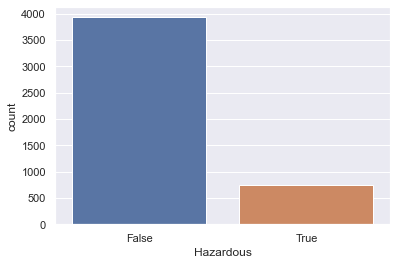

In [12]:
ax = sns.countplot(x="Hazardous", data=star_data_dropped2)
plt.show()

In [13]:
star_data_dropped2['Hazardous'].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [14]:
print(f'The ratio of Hazardous to non-hazardous asteroids in the dataset is {3922/755}')

The ratio of Hazardous to non-hazardous asteroids in the dataset is 5.194701986754967


<b> There are significantly more non-hazardous asteroids to hazardous at a ratio of 5.19:1. We need to take note of this class imbalance when training our models later.

In [15]:
star_data_dropped2.isnull().values.any()

False

In [16]:
star_data_dropped2.duplicated().any()

False

<b> There are no duplicate rows, or columns with NaN value

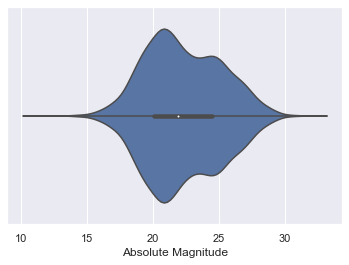

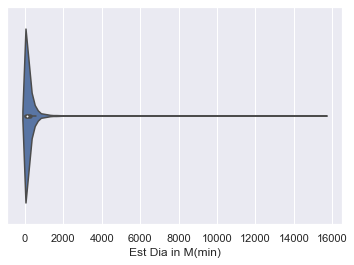

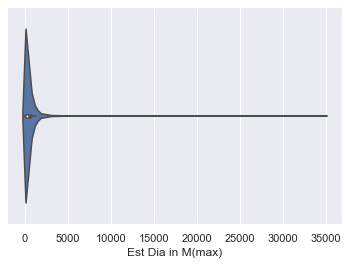

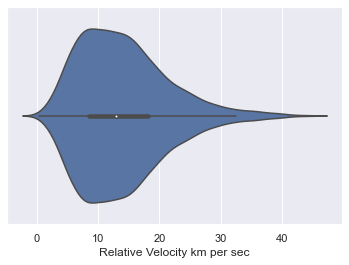

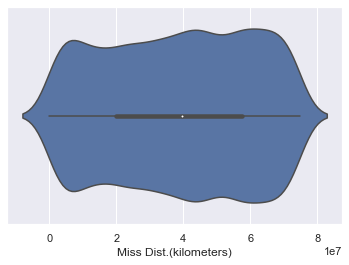

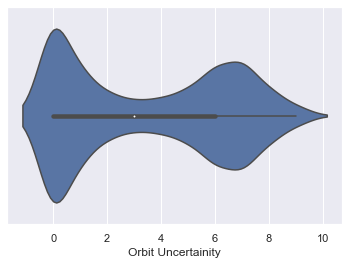

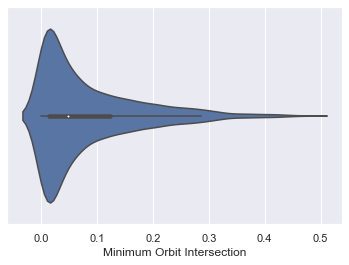

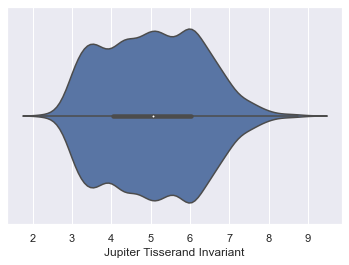

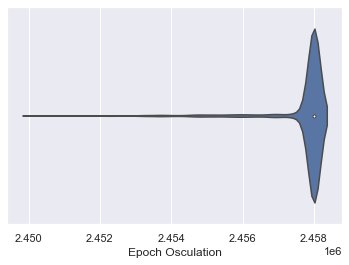

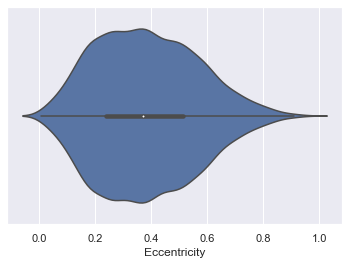

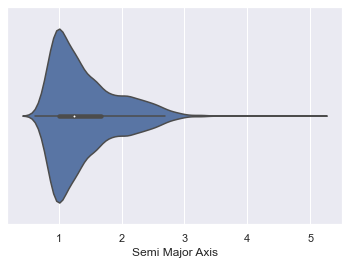

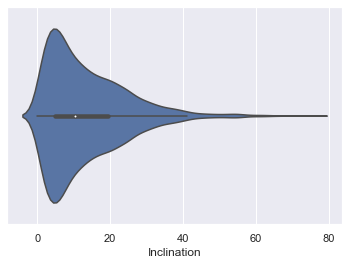

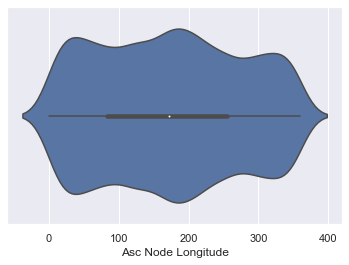

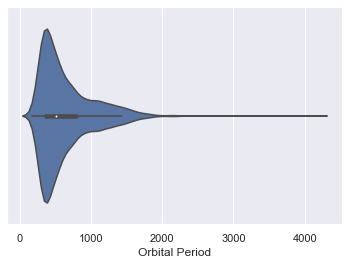

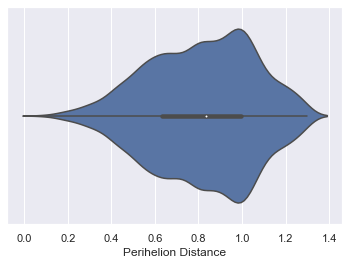

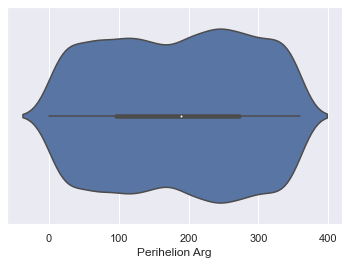

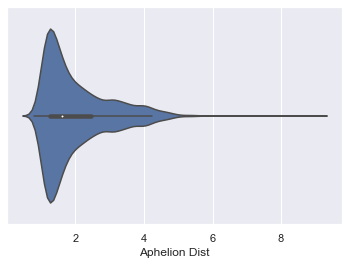

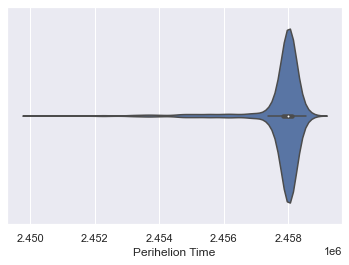

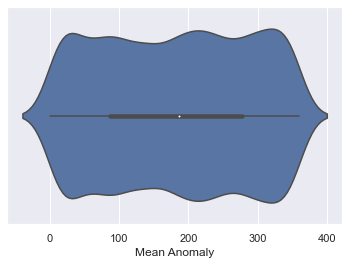

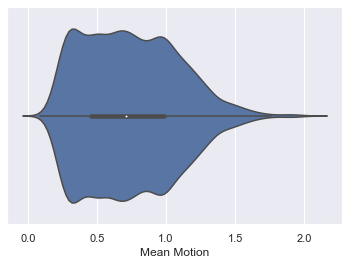

In [17]:
for columns in star_data_dropped2:
    if (pd.api.types.is_int64_dtype(star_data_dropped2[columns]) or pd.api.types.is_float_dtype(star_data_dropped2[columns])):
        ax = sns.violinplot(data=star_data_dropped2, x=columns, kde=True)
        plt.show()
    else:
        pass

Absolute Magnitude


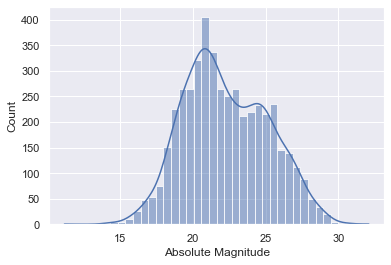

Est Dia in M(min)


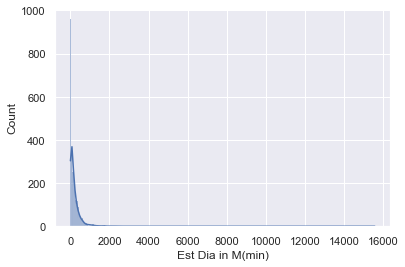

Est Dia in M(max)


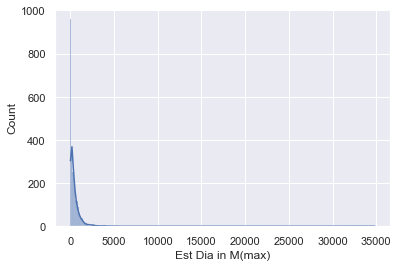

Relative Velocity km per sec


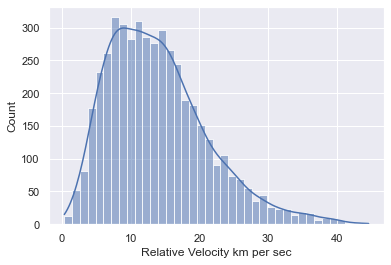

Miss Dist.(kilometers)


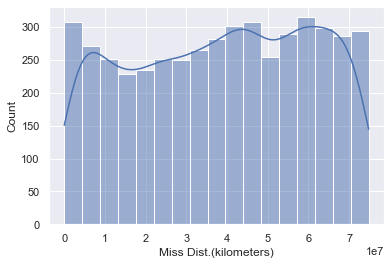

Orbit Uncertainity


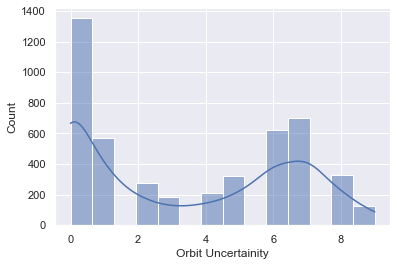

Minimum Orbit Intersection


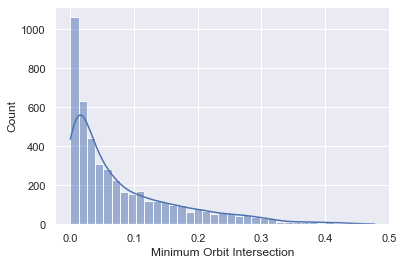

Jupiter Tisserand Invariant


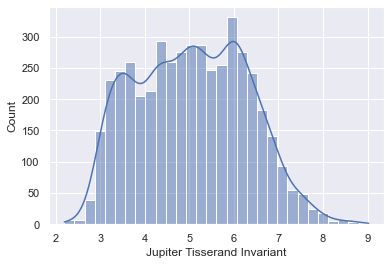

Epoch Osculation


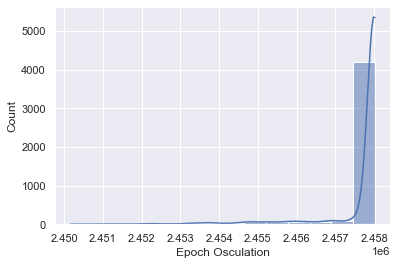

Eccentricity


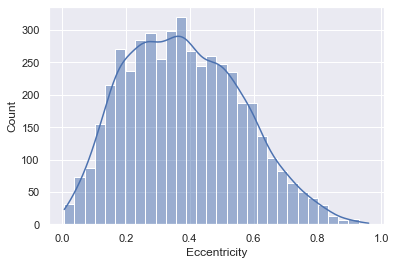

Semi Major Axis


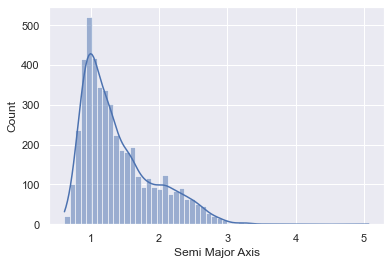

Inclination


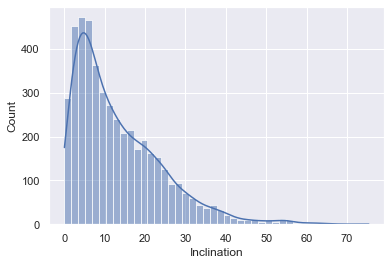

Asc Node Longitude


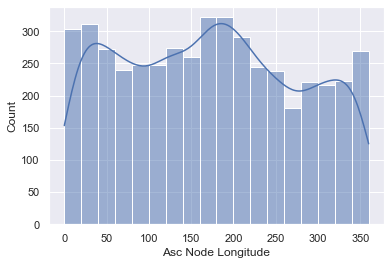

Orbital Period


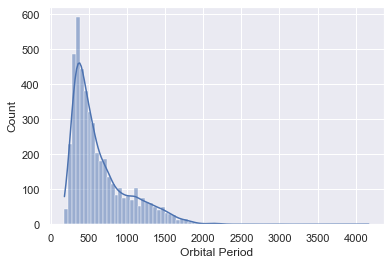

Perihelion Distance


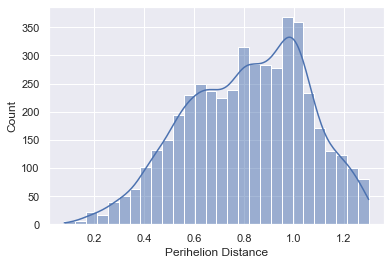

Perihelion Arg


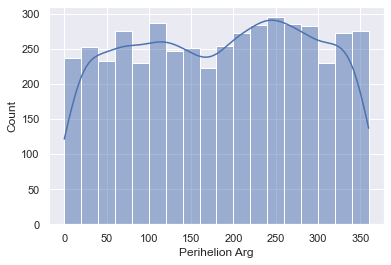

Aphelion Dist


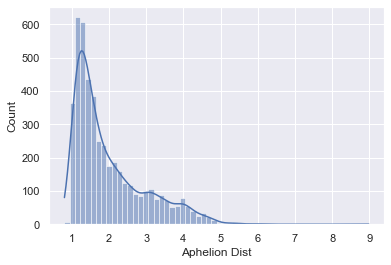

Perihelion Time


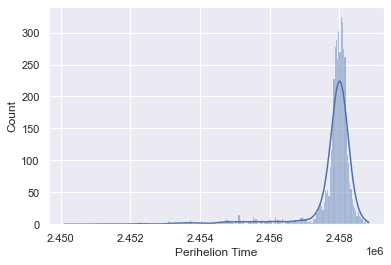

Mean Anomaly


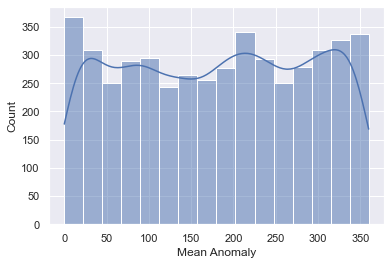

Mean Motion


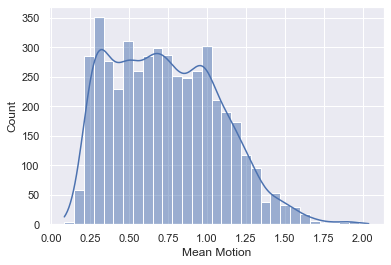

In [18]:
for columns in star_data_dropped2:
    if (pd.api.types.is_int64_dtype(star_data_dropped2[columns]) or pd.api.types.is_float_dtype(star_data_dropped2[columns])):
        print(columns)
        ax = sns.histplot(data=star_data_dropped2, x=columns, kde=True)
        plt.show()
    else:
        pass

<b> From the above histogram and violin plots, Epoch Osculation for all the asteroids seem to very tightly distributed around a particular value, so we will investigate further.

In [19]:
star_data_dropped2['Epoch Osculation'].value_counts()

2458000.5    4048
2457600.5      64
2457800.5      55
2455707.5       5
2457431.5       4
             ... 
2454806.5       1
2454791.5       1
2454765.5       1
2454768.5       1
2457637.5       1
Name: Epoch Osculation, Length: 429, dtype: int64

In [20]:
star_data_dropped2['Epoch Osculation'].round(0).value_counts()

2458000.0    4048
2457600.0      64
2457800.0      55
2455708.0       5
2456922.0       5
             ... 
2454922.0       1
2454790.0       1
2455654.0       1
2454748.0       1
2454418.0       1
Name: Epoch Osculation, Length: 400, dtype: int64

In [21]:
star_data_dropped2['Epoch Osculation'].round(0).describe()

count    4.687000e+03
mean     2.457723e+06
std      9.201724e+02
min      2.450164e+06
25%      2.458000e+06
50%      2.458000e+06
75%      2.458000e+06
max      2.458020e+06
Name: Epoch Osculation, dtype: float64

In [22]:
star_data_dropped2['Epoch Osculation'].round(0).nunique()

400

<b> There are only 400 unique values for epoch osculation, with 4048 values with an identical value, so the discrimnatory power of Epoch Osculation is poor, so we will be dropping it

In [23]:
star_data_dropped3 = star_data_dropped2.drop(columns=['Epoch Osculation'], axis=1)

In [24]:
count = 1
for col in star_data_dropped3:
    print(f'{count} \t {col}')
    count+=1

1 	 Absolute Magnitude
2 	 Est Dia in M(min)
3 	 Est Dia in M(max)
4 	 Relative Velocity km per sec
5 	 Miss Dist.(kilometers)
6 	 Orbit Uncertainity
7 	 Minimum Orbit Intersection
8 	 Jupiter Tisserand Invariant
9 	 Eccentricity
10 	 Semi Major Axis
11 	 Inclination
12 	 Asc Node Longitude
13 	 Orbital Period
14 	 Perihelion Distance
15 	 Perihelion Arg
16 	 Aphelion Dist
17 	 Perihelion Time
18 	 Mean Anomaly
19 	 Mean Motion
20 	 Hazardous


In [25]:
star_data_dropped3['Perihelion Time'].value_counts()

2.458098e+06    7
2.458173e+06    7
2.457995e+06    6
2.457914e+06    6
2.455534e+06    5
               ..
2.458025e+06    1
2.453556e+06    1
2.458240e+06    1
2.458268e+06    1
2.458319e+06    1
Name: Perihelion Time, Length: 3692, dtype: int64

In [26]:
star_data_dropped3['Perihelion Time'].round(0).value_counts()

2458043.0    21
2457983.0    18
2458114.0    17
2458123.0    16
2457902.0    16
             ..
2455648.0     1
2455617.0     1
2457017.0     1
2454958.0     1
2458319.0     1
Name: Perihelion Time, Length: 1388, dtype: int64

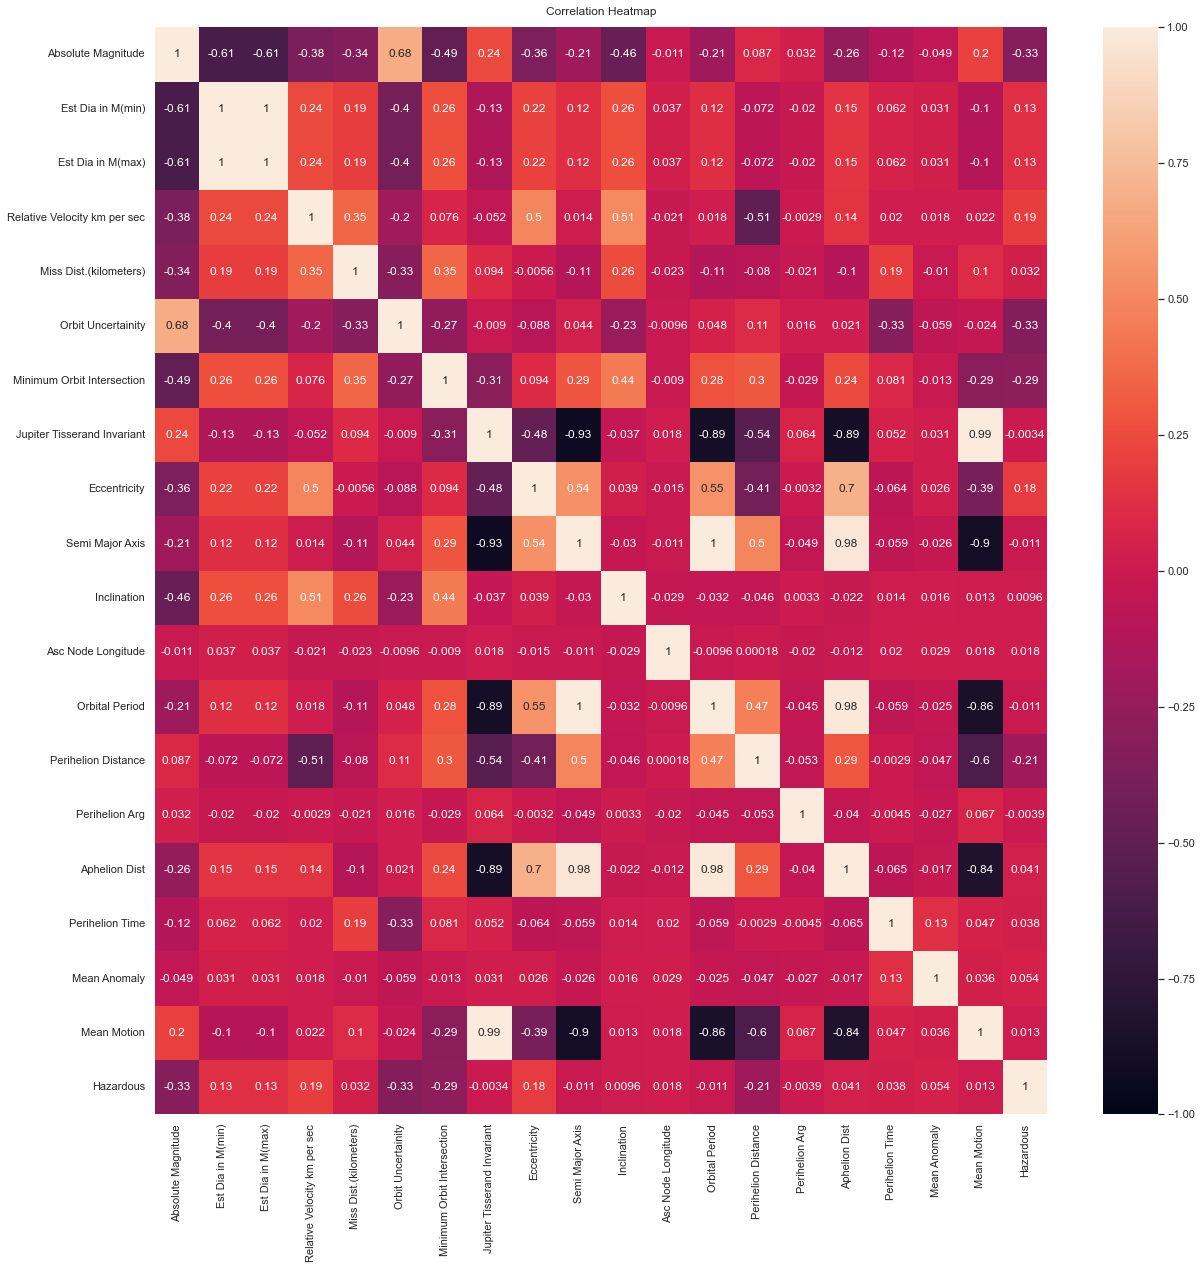

In [27]:
plt.figure(figsize=(20,20)) 
ax = sns.heatmap(star_data_dropped3.corr(), vmin=-1, vmax=1, annot=True)
ax.set_title('Correlation Heatmap',  pad=12)

plt.show()

<b> Est Dia in M(min) and Est Dia in M(max) have perfect correlation, so we can keep just one variable, Est Dia in M(max) and drop Est Dia in M(min) to predict what we are interested in.
    
<b>In addition Semi Major Axis and Orbital Period have perfect correlation, as Orbital Period is calculated from Semi Major Axis, so we will keep Semi Major Axis and drop Orbital Period

In [28]:
star_data_dropped4 = star_data_dropped3.drop(columns=['Est Dia in M(min)', 'Orbital Period'], axis=1)

In [29]:
count = 1
for col in star_data_dropped4:
    print(f'{count} \t {col}')
    count+=1

1 	 Absolute Magnitude
2 	 Est Dia in M(max)
3 	 Relative Velocity km per sec
4 	 Miss Dist.(kilometers)
5 	 Orbit Uncertainity
6 	 Minimum Orbit Intersection
7 	 Jupiter Tisserand Invariant
8 	 Eccentricity
9 	 Semi Major Axis
10 	 Inclination
11 	 Asc Node Longitude
12 	 Perihelion Distance
13 	 Perihelion Arg
14 	 Aphelion Dist
15 	 Perihelion Time
16 	 Mean Anomaly
17 	 Mean Motion
18 	 Hazardous


Absolute Magnitude


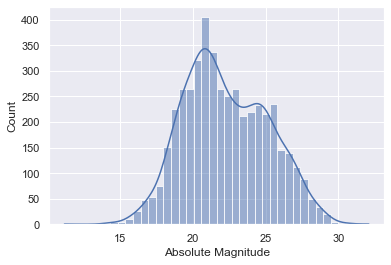

Est Dia in M(max)


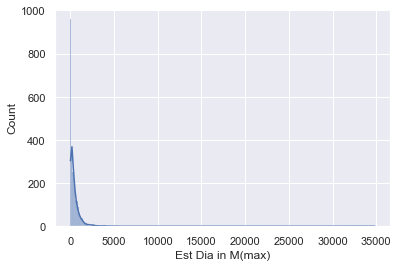

Relative Velocity km per sec


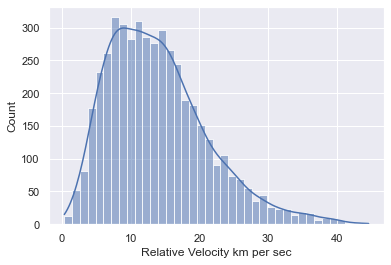

Miss Dist.(kilometers)


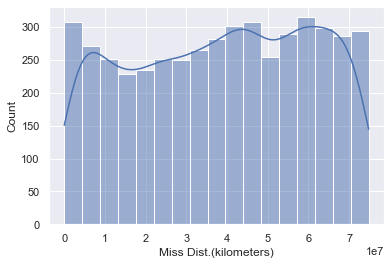

Orbit Uncertainity


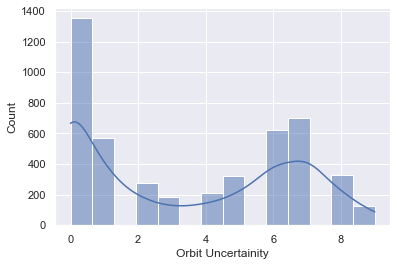

Minimum Orbit Intersection


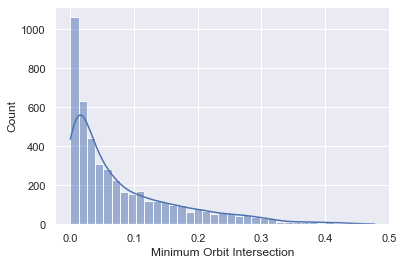

Jupiter Tisserand Invariant


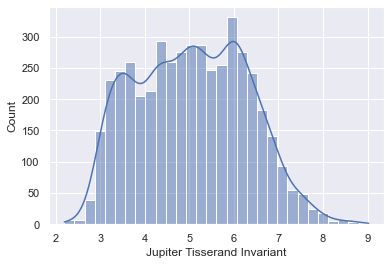

Eccentricity


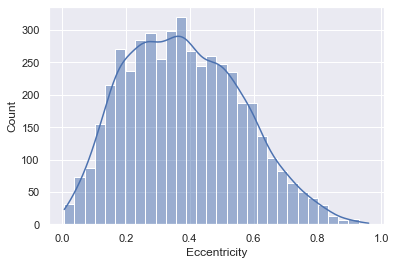

Semi Major Axis


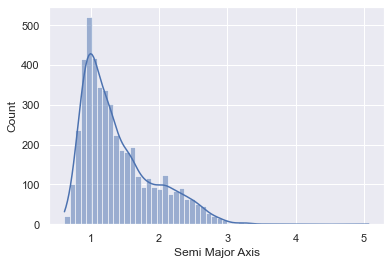

Inclination


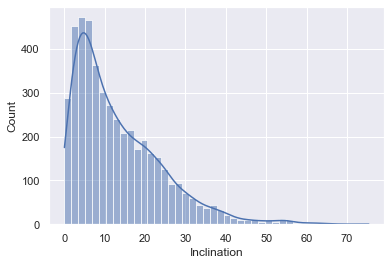

Asc Node Longitude


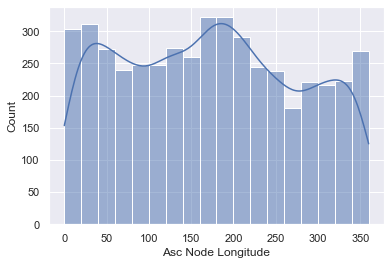

Perihelion Distance


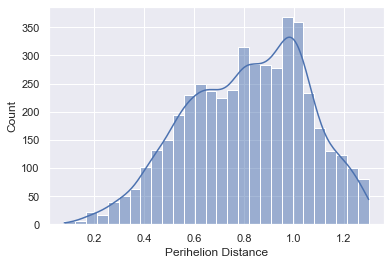

Perihelion Arg


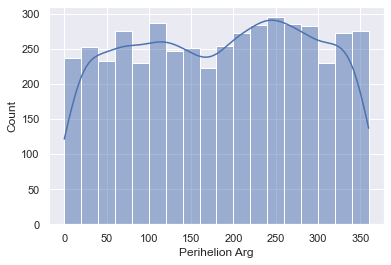

Aphelion Dist


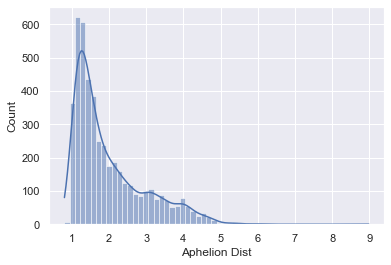

Perihelion Time


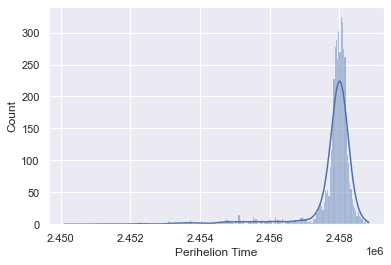

Mean Anomaly


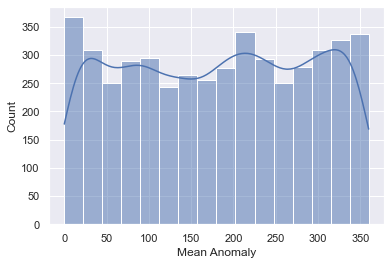

Mean Motion


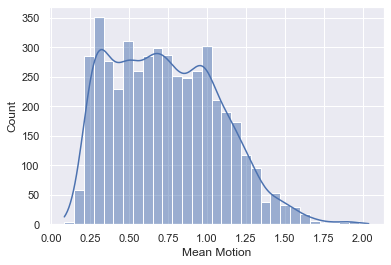

In [30]:
for columns in star_data_dropped4:
    if (pd.api.types.is_int64_dtype(star_data_dropped4[columns]) or pd.api.types.is_float_dtype(star_data_dropped4[columns])):
        print(columns)
        ax = sns.histplot(data=star_data_dropped4, x=columns, kde=True)
        plt.show()
    else:
        pass

## There are some very skewed variables: 
1. Est Dia in M(max) - correct with cube root
2. Minimum Orbit Intersection - correct with cube root
3. Perihelion Time - attempt by cubing

<AxesSubplot:xlabel='Perihelion Time', ylabel='Count'>

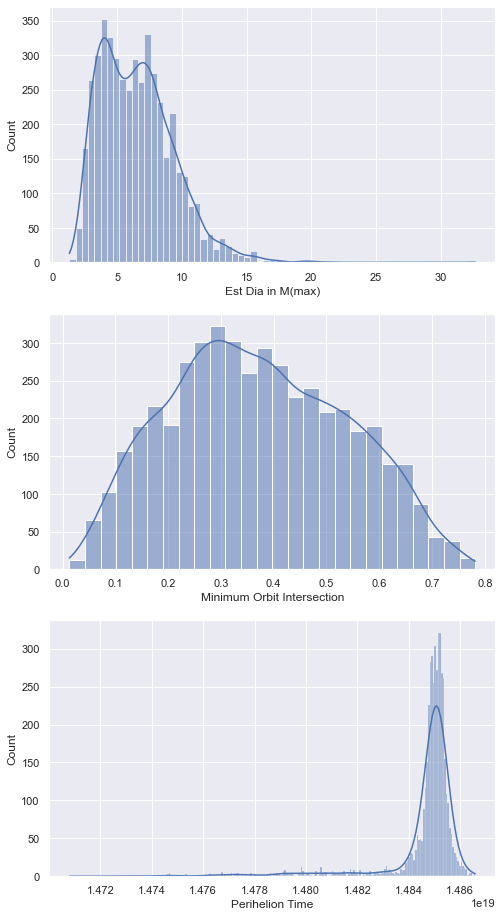

In [31]:
star_data_dropped4['Est Dia in M(max)'] = np.power((star_data_dropped4['Est Dia in M(max)']), 1/3)
star_data_dropped4['Minimum Orbit Intersection'] = np.power((star_data_dropped4['Minimum Orbit Intersection']), 1/3)
star_data_dropped4['Perihelion Time']=np.power((star_data_dropped4['Perihelion Time']), 3)

f, axes = plt.subplots(3, 1, figsize=(8, 16))
sns.histplot(data=star_data_dropped4, x='Est Dia in M(max)', kde=True, ax = axes[0])
sns.histplot(data=star_data_dropped4, x='Minimum Orbit Intersection', kde=True, ax = axes[1])
sns.histplot(data=star_data_dropped4, x='Perihelion Time', kde=True, ax = axes[2])